In [310]:
import pandas as pd 
import math 
import itertools
import time
import matplotlib.pyplot as plt

## Complete Assignment

In [286]:
data = pd.read_csv("data.csv")
courses = pd.read_csv("courses.csv")
data

,Roll Number,Name,Program,Branch,Preference-1,Grade-1,Preference-2,Grade-2,Preference-3,Grade-3,Preference-4,Grade-4,Preference-5,Grade-5
0,D20AI049,Divij Ramachandran,M.Tech-PhD 4,AI,DL-Ops,A-,Principles of Programming Languages,A,Data Engineering,A,Data Structures and Algorithms,A,Software Engineering,A
1,D23CS009,Dharmajan Tella,M.Tech-PhD 1,CS,PCS1,A,Data Structures and Algorithms,A,Data Engineering,B,PCS2,A-,Optimization in ML,A
2,B20CS176,Raghav Dara,UG 4,CS,Data Engineering,A,Introduction to Computer Science,A,PCS1,A,Pattern Recognition and Machine Learning,A,Principles of Programming Languages,B
3,M23CS137,Biju Kakar,M.Tech 1,AI,Operating Systems,A,Pattern Recognition and Machine Learning,A,Design and Analysis of Algorithms,A-,Introduction to Computer Science,A,PCS2,A
4,M23AI032,Navya Bhatti,M.Tech 1,AI,Operating Systems,A,Introduction to Computer Science,B,DL-Ops,A-,Data Engineering,B-,Database Systems,B-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,M23CS088,Vidur Devan,M.Tech 1,AI,Database Systems,A,PCS1,A,Machine Learning,A-,Computer Architecture,B,Introduction to Computer Science,A
196,D23AI091,Zara Sem,M.Tech-PhD 1,CS,PCS1,A,Artificial Intelligence,A,Data Structures and Algorithms,A,Software Engineering,A-,Optimization in ML,A
197,P23AI068,Kavya Ramachandran,PhD 1,CS,Maths for Computing,A-,Software Engineering,A,Introduction to Computer Graphics,A-,Machine Learning,B-,DL-Ops,A-
198,P23AI112,Yasmin Savant,PhD 1,CS,Data Structures and Algorithms,A,DL-Ops,A,Introduction to Computer Science,B-,Design and Analysis of Algorithms,A-,Introduction to Computer Graphics,A-


In [287]:
courses

,Course Code,Course Name,Offered for,Credits,No. of Students
0,CSL3090,Artificial Intelligence,UG 3|UG 4,3-0-0,60
1,CSL3080,Computer Architecture,UG 3,3-0-0,100
2,CSL3050,Computer Networks,UG 3,3-0-3,100
3,CSL3060,Database Systems,UG 3,3-0-2,160
4,CSL4010,Optimization in ML,UG 3|UG 4,3-0-3,250
5,CSL7020,Machine Learning,M.Tech 2|PhD 1,3-0-0,100
6,CSL2090,PCS2,UG 2,3-0-2,60
7,CSL1010,Introduction to Computer Science,UG 1,3-0-2,210
8,CSL2020,Data Structures and Algorithms,UG 2,3-0-2,250
9,CSL2070,Software Engineering,UG 2,3-0-2,100


In [288]:

for i in courses.index : 
    if courses["No. of Students"][i] <= 20 : 
        courses.drop( i , inplace = True ) 

courses.reset_index( inplace=True , drop = True )
courses

,Course Code,Course Name,Offered for,Credits,No. of Students
0,CSL3090,Artificial Intelligence,UG 3|UG 4,3-0-0,60
1,CSL3080,Computer Architecture,UG 3,3-0-0,100
2,CSL3050,Computer Networks,UG 3,3-0-3,100
3,CSL3060,Database Systems,UG 3,3-0-2,160
4,CSL4010,Optimization in ML,UG 3|UG 4,3-0-3,250
5,CSL7020,Machine Learning,M.Tech 2|PhD 1,3-0-0,100
6,CSL2090,PCS2,UG 2,3-0-2,60
7,CSL1010,Introduction to Computer Science,UG 1,3-0-2,210
8,CSL2020,Data Structures and Algorithms,UG 2,3-0-2,250
9,CSL2070,Software Engineering,UG 2,3-0-2,100


In [289]:
for j in range(1 , 6) : 
    g = "Grade-" + str(j) 
    for i in range(len(data)) : 
        if(data[g][i] == 'B' or data[g][i] == 'B-') : 
            data[g][i] = 'N/A' 
            data['Preference-' + str(j)][i] = 'N/A'

In [290]:
seniority={
        'UG 1':1,
        'UG 2':2,
        'UG 3':3,
        'UG 4':4,
        'M.Tech 1':5,
        'M.Tech-M.Tech 1' : 5 ,
        'M.Tech-PhD 1':6,
        'PhD 1':7,
        'M.Tech 2':8,
        'M.Tech-PhD 2':9,
        'PhD 2':10,
        'M.Tech-PhD 3':11,
        'PhD 3':12,
        'M.Tech-PhD 4':13,
        'PhD 4':14,
        'M.Tech-PhD 5':15,
        'PhD 5':16,
    }

In [291]:
for j in range(1 , 6) : 
    p = "Preference-" + str(j) 

    for i in range(len(data)) :  
        
        prog = data['Program'][i] 
        
        course = data[p][i]
        if(course == 'N/A') : 
            continue
        temp_df = courses[courses['Course Name'] == course]
        if len(temp_df) == 0 : 
            continue
        offered_for = list(temp_df['Offered for'])[0]
        
        offered_for = offered_for.split('|')
        for k in offered_for:
            
            if(seniority[prog] <= seniority[k])  : 
                data[p][i] = 'N/A' 
                data['Grade-' + str(j)][i] = 'N/A'
                break

data

,Roll Number,Name,Program,Branch,Preference-1,Grade-1,Preference-2,Grade-2,Preference-3,Grade-3,Preference-4,Grade-4,Preference-5,Grade-5
0,D20AI049,Divij Ramachandran,M.Tech-PhD 4,AI,DL-Ops,A-,Principles of Programming Languages,A,Data Engineering,A,Data Structures and Algorithms,A,Software Engineering,A
1,D23CS009,Dharmajan Tella,M.Tech-PhD 1,CS,PCS1,A,Data Structures and Algorithms,A,N/A,N/A,PCS2,A-,Optimization in ML,A
2,B20CS176,Raghav Dara,UG 4,CS,Data Engineering,A,Introduction to Computer Science,A,PCS1,A,Pattern Recognition and Machine Learning,A,N/A,N/A
3,M23CS137,Biju Kakar,M.Tech 1,AI,Operating Systems,A,Pattern Recognition and Machine Learning,A,Design and Analysis of Algorithms,A-,Introduction to Computer Science,A,PCS2,A
4,M23AI032,Navya Bhatti,M.Tech 1,AI,Operating Systems,A,N/A,N/A,DL-Ops,A-,N/A,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,M23CS088,Vidur Devan,M.Tech 1,AI,Database Systems,A,PCS1,A,N/A,N/A,N/A,N/A,Introduction to Computer Science,A
196,D23AI091,Zara Sem,M.Tech-PhD 1,CS,PCS1,A,Artificial Intelligence,A,Data Structures and Algorithms,A,Software Engineering,A-,Optimization in ML,A
197,P23AI068,Kavya Ramachandran,PhD 1,CS,Maths for Computing,A-,Software Engineering,A,Introduction to Computer Graphics,A-,N/A,N/A,DL-Ops,A-
198,P23AI112,Yasmin Savant,PhD 1,CS,Data Structures and Algorithms,A,DL-Ops,A,N/A,N/A,Design and Analysis of Algorithms,A-,Introduction to Computer Graphics,A-


In [292]:
def get_detail( data , course ) : 
    detail = []
    for num in range(1 , 6):
        column = "Preference-" + str( num ) 
        temp_data = data[data[column] == course] 
#         temp_list = list(temp['Roll Number']) 
        
        for i in temp_data.index : 
            if(temp_data['Program'][i] == 'UG 3') :
                detail.append( [1 , 5 - num , temp_data['Roll Number'][i]])
            elif temp_data['Program'][i] == 'UG 4' :
                detail.append( [2 , 5 - num , temp_data['Roll Number'][i]])
            elif temp_data['Program'][i] == 'M.Tech 1' or temp_data['Program'][i] == 'PhD 1' or temp_data['Program'][i] == 'M.Tech-PhD 1':
                detail.append( [3 , 5 - num , temp_data['Roll Number'][i]])
            elif temp_data['Program'][i] == 'M.tech 2' :
                detail.append( [4 , 5 - num , temp_data['Roll Number'][i]])
            elif temp_data['Program'][i] != 'N/A':
                detail.append( [5 , 5 - num , temp_data['Roll Number'][i]])
    detail.sort() 
    detail.reverse()
    return detail 

In [293]:
def extract_credit( L_T_P ) : 
    L_T_P = L_T_P.split('-')
    credit = int(L_T_P[0]) + int(L_T_P[1]) + int(L_T_P[2])/2
    return credit

In [294]:
def find_subsets(  l , n ) :
    return list(itertools.combinations( l , n ))

In [295]:
def number_of_tas( courses , course , ta_per_credit_student) : 
    temp = courses[courses['Course Name'] == course ]
    num_students = list(temp['No. of Students'])[0] 
    credit = extract_credit( list(temp['Credits'])[0])  
    
    tas = math.ceil((num_students * credit) / ta_per_credit_student )
#     if num_students <= 20 : 
#         tas = 0 
    return tas

In [297]:
course_details = {} 
ta_per_credit_per_student = int(input())
course_list = list(courses['Course Name'])
for i in range(len(course_list)) : 
    course = course_list[i] 
    ta_list = get_detail(data , course) 
    num_tas = number_of_tas(courses , course , ta_per_credit_per_student )
#     if num_tas == 0  : 
#         course_details[course] = []
#         continue
    ta_list = find_subsets(ta_list , num_tas ) 
    course_details[course] = ta_list 


200


In [298]:
def check_constraint( to_assign , course ) : 
    ug = 0 
    total = len(to_assign) 
    phd = 0 
    for i in to_assign: 
        if i[2][0] == 'B' : 
            ug += 1 
        elif i[2][0] == 'P' or i[2][0] == 'D' : 
            phd += 1 
    num_students = list(courses[courses['Course Name']== course ]['No. of Students'])[0] 
    
    if phd < math.ceil(num_students/100) : 
        return False 
    elif ug > 0.6 * total : 
        return False 
    return True 

In [299]:
allocation = {}
def backtracking_search( course_list , i , assigned , course_details) : 
    global allocation
    n = len(course_list) 
    if i == n : 
        allocation = assigned 
        return True 
    can_assign = False
    course = course_list[i] 
    for j in range(len(course_details[course]) ) : 
        to_assign = course_details[course][j] 
        flag = 0 
        for k in to_assign : 
            if k[2] in assigned : 
                flag = 1 
                break
        if not check_constraint(to_assign , course ) and flag == 0 : 
            flag = 1 
        if flag == 1 : 
            continue
        for k in to_assign: 
            assigned[k[2]] = course 
            
        can_assign = can_assign or backtracking_search(course_list , i + 1 , assigned , course_details) 
        if can_assign == True  : 
            allocation = assigned
            return True 
        for k in to_assign: 
            del assigned[k[2]]
    
    return False

In [300]:
course_list = list(courses['Course Name'])

start_time = time.time()  
backtracking_search( course_list , 0 , {} , course_details) 
end_time = time.time()

In [301]:
print(allocation)

{'P22AI064': 'Artificial Intelligence', 'P22AI029': 'Computer Architecture', 'P19CS139': 'Computer Architecture', 'P20AI058': 'Computer Networks', 'M22AI072': 'Computer Networks', 'D19CS124': 'Computer Networks', 'P21CS063': 'Database Systems', 'P20AI010': 'Database Systems', 'P19AI084': 'Database Systems', 'M22AI058': 'Database Systems', 'P19AI090': 'Optimization in ML', 'M22AI191': 'Optimization in ML', 'D21AI132': 'Optimization in ML', 'D19AI128': 'Optimization in ML', 'M22CS128': 'Optimization in ML', 'P21AI015': 'Optimization in ML', 'P22AI121': 'Machine Learning', 'P22AI008': 'Machine Learning', 'P21AI121': 'PCS2', 'M22AI139': 'PCS2', 'M22CS012': 'Introduction to Computer Science', 'M22AI151': 'Introduction to Computer Science', 'D22CS052': 'Introduction to Computer Science', 'D22AI177': 'Introduction to Computer Science', 'D21AI191': 'Introduction to Computer Science', 'M22CS032': 'Data Structures and Algorithms', 'M22AI182': 'Data Structures and Algorithms', 'D21CS111': 'Data S

In [302]:
print("Execution Time is " , end = "")
print(end_time - start_time)

Execution Time is 0.20627617835998535


In [303]:
course_ta = {} 
for i in allocation: 
    if allocation[i] in course_ta: 
        course_ta[allocation[i]].append(i) 
    else: 
        course_ta[allocation[i]] = [i] 

In [304]:
for i in course_ta: 
    print(i , " -> " , end = "") 
    for j in course_ta[i] : 
        print( j , " ,", end = " ")
    print()
    

Artificial Intelligence  -> P22AI064  , 
Computer Architecture  -> P22AI029  , P19CS139  , 
Computer Networks  -> P20AI058  , M22AI072  , D19CS124  , 
Database Systems  -> P21CS063  , P20AI010  , P19AI084  , M22AI058  , 
Optimization in ML  -> P19AI090  , M22AI191  , D21AI132  , D19AI128  , M22CS128  , P21AI015  , 
Machine Learning  -> P22AI121  , P22AI008  , 
PCS2  -> P21AI121  , M22AI139  , 
Introduction to Computer Science  -> M22CS012  , M22AI151  , D22CS052  , D22AI177  , D21AI191  , 
Data Structures and Algorithms  -> M22CS032  , M22AI182  , D21CS111  , D19AI033  , P20CS049  , 
Software Engineering  -> M22CS083  , P20CS128  , 
Maths for Computing  -> P20AI125  , P19AI007  , D21AI050  , D19AI165  , 
Pattern Recognition and Machine Learning  -> P22CS068  , P21CS090  , M22CS180  , M22CS094  , D20AI052  , 
PCS1  -> P21AI086  , 
Data Engineering  -> P22CS184  , P22CS118  , 
Operating Systems  -> M22CS161  , D22CS038  , 
Principles of Programming Languages  -> P21CS074  , P20CS132  , 


In [305]:
Allocated = pd.DataFrame() 

In [306]:
l1 = [] 
l2 = [] 
l3 = []
for i in allocation: 
    l1.append(i) 
    l2.append(allocation[i]) 
    temp = data[data['Roll Number'] == i]
    pref = 0 
    if(list(temp["Preference-1"])[0] == allocation[i] ) : 
        pref = 1
    elif(list(temp["Preference-2"])[0] == allocation[i] ) : 
        pref = 2
    elif(list(temp["Preference-3"])[0] == allocation[i] ) : 
        pref = 3
    elif(list(temp["Preference-4"])[0] == allocation[i] ) : 
        pref = 4
    elif(list(temp["Preference-5"])[0] == allocation[i] ) : 
        pref = 5
    l3.append( pref )
Allocated["Roll No."] = l1 
Allocated["Course Assigned"] = l2  
Allocated["Preference"] = l3

In [307]:
from collections import Counter 
print(Counter(Allocated["Preference"])) 

Allocated

Counter({1: 49, 2: 6, 3: 1})


,Roll No.,Course Assigned,Preference
0,P22AI064,Artificial Intelligence,1
1,P22AI029,Computer Architecture,1
2,P19CS139,Computer Architecture,1
3,P20AI058,Computer Networks,1
4,M22AI072,Computer Networks,1
5,D19CS124,Computer Networks,1
6,P21CS063,Database Systems,1
7,P20AI010,Database Systems,1
8,P19AI084,Database Systems,1
9,M22AI058,Database Systems,1


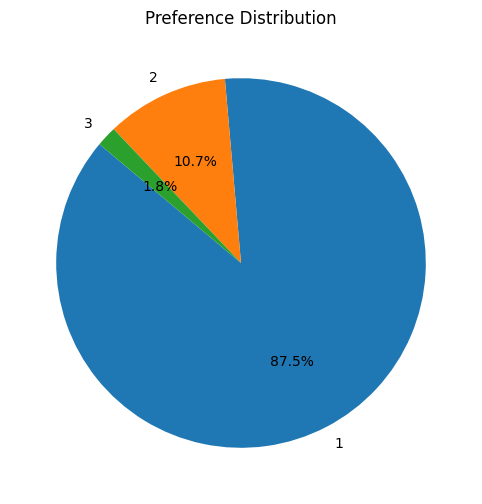

In [311]:
preference_counts = Allocated['Preference'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(preference_counts, labels=preference_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Preference Distribution')
plt.show()

In [313]:
allocated_ta_data = data[data['Roll Number'].isin(allocation)  ]
allocated_ta_data

,Roll Number,Name,Program,Branch,Preference-1,Grade-1,Preference-2,Grade-2,Preference-3,Grade-3,Preference-4,Grade-4,Preference-5,Grade-5
11,M22CS180,Raghav Venkataraman,M.Tech 2,CS,Pattern Recognition and Machine Learning,A-,Artificial Intelligence,A,Computer Networks,A-,Optimization in ML,A,Design and Analysis of Algorithms,A-
15,M22CS032,Prerak Dugal,M.Tech 2,CS,Data Structures and Algorithms,A,Computer Architecture,A,PCS2,A,Computer Vision,A,Machine Learning,A-
19,P19AI007,Kabir Som,PhD 5,AI,Maths for Computing,A-,Pattern Recognition and Machine Learning,B,PCS2,A-,Design and Analysis of Algorithms,A,Introduction to Computer Science,A-
24,M22CS083,Shalv Zacharia,M.Tech 2,AI,Software Engineering,A,Introduction to Computer Graphics,B,Operating Systems,A,Optimization in ML,A,Database Systems,A-
25,M22CS094,Abram Baral,M.Tech 2,AI,Pattern Recognition and Machine Learning,A-,Introduction to Computer Science,B,Maths for Computing,B-,Database Systems,A-,Machine Learning,A
27,D21AI050,Jayesh Bhagat,M.Tech-PhD 3,CS,Maths for Computing,A-,Introduction to Computer Science,A-,PCS2,A-,Operating Systems,A-,PCS1,A-
30,M22CS128,Misha Shan,M.Tech 2,AI,DL-Ops,A,Optimization in ML,A,Design and Analysis of Algorithms,B,Computer Networks,A,Introduction to Computer Graphics,A
31,M22CS012,Rasha Goswami,M.Tech 2,CS,Introduction to Computer Science,A,Maths for Computing,A,Artificial Intelligence,A,Operating Systems,A-,Pattern Recognition and Machine Learning,A
32,M22CS199,Amira Mani,M.Tech 2,CS,Design and Analysis of Algorithms,A,Artificial Intelligence,A-,Operating Systems,A,Data Engineering,B,Maths for Computing,A-
34,D20AI052,Piya Tata,M.Tech-PhD 4,CS,Pattern Recognition and Machine Learning,A-,Database Systems,A,Introduction to Computer Science,A,Design and Analysis of Algorithms,A,Machine Learning,A


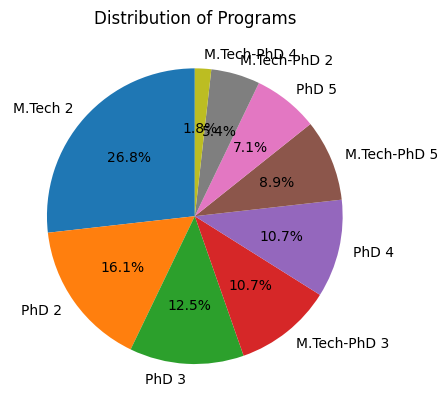

In [315]:
program_counts = allocated_ta_data['Program'].value_counts()

program_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Programs')
plt.ylabel('')  
plt.show()

In [308]:
data = pd.read_csv("data.csv")

In [272]:
not_allocated_ta = [] 
for i in range(len(data)): 
    if( data['Roll Number'][i] not in allocation) : 
        not_allocated_ta.append(data["Roll Number"][i])

In [273]:

Unallocated = data[data['Roll Number'].isin(not_allocated_ta)]

In [274]:
Unallocated = Unallocated.reset_index(drop=True)

In [275]:
Unallocated

,Roll Number,Name,Program,Branch,Preference-1,Grade-1,Preference-2,Grade-2,Preference-3,Grade-3,Preference-4,Grade-4,Preference-5,Grade-5
0,D20AI049,Divij Ramachandran,M.Tech-PhD 4,AI,DL-Ops,A-,Principles of Programming Languages,A,Data Engineering,A,Data Structures and Algorithms,A,Software Engineering,A
1,D23CS009,Dharmajan Tella,M.Tech-PhD 1,CS,PCS1,A,Data Structures and Algorithms,A,Data Engineering,B,PCS2,A-,Optimization in ML,A
2,B20CS176,Raghav Dara,UG 4,CS,Data Engineering,A,Introduction to Computer Science,A,PCS1,A,Pattern Recognition and Machine Learning,A,Principles of Programming Languages,B
3,M23CS137,Biju Kakar,M.Tech 1,AI,Operating Systems,A,Pattern Recognition and Machine Learning,A,Design and Analysis of Algorithms,A-,Introduction to Computer Science,A,PCS2,A
4,M23AI032,Navya Bhatti,M.Tech 1,AI,Operating Systems,A,Introduction to Computer Science,B,DL-Ops,A-,Data Engineering,B-,Database Systems,B-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,M23CS088,Vidur Devan,M.Tech 1,AI,Database Systems,A,PCS1,A,Machine Learning,A-,Computer Architecture,B,Introduction to Computer Science,A
134,D23AI091,Zara Sem,M.Tech-PhD 1,CS,PCS1,A,Artificial Intelligence,A,Data Structures and Algorithms,A,Software Engineering,A-,Optimization in ML,A
135,P23AI068,Kavya Ramachandran,PhD 1,CS,Maths for Computing,A-,Software Engineering,A,Introduction to Computer Graphics,A-,Machine Learning,B-,DL-Ops,A-
136,P23AI112,Yasmin Savant,PhD 1,CS,Data Structures and Algorithms,A,DL-Ops,A,Introduction to Computer Science,B-,Design and Analysis of Algorithms,A-,Introduction to Computer Graphics,A-


In [276]:
Unallocated.to_csv("unallocated_ta.csv" , index = False)

In [277]:
Allocated.to_csv("allocated_ta.csv" , index = "False") 

## Incomplete Assignment

In [278]:
data = pd.read_csv("data.csv")[0:30] # taking total ta applicatoins less than available 
courses = pd.read_csv("courses.csv")
data

,Roll Number,Name,Program,Branch,Preference-1,Grade-1,Preference-2,Grade-2,Preference-3,Grade-3,Preference-4,Grade-4,Preference-5,Grade-5
0,D20AI049,Divij Ramachandran,M.Tech-PhD 4,AI,DL-Ops,A-,Principles of Programming Languages,A,Data Engineering,A,Data Structures and Algorithms,A,Software Engineering,A
1,D23CS009,Dharmajan Tella,M.Tech-PhD 1,CS,PCS1,A,Data Structures and Algorithms,A,Data Engineering,B,PCS2,A-,Optimization in ML,A
2,B20CS176,Raghav Dara,UG 4,CS,Data Engineering,A,Introduction to Computer Science,A,PCS1,A,Pattern Recognition and Machine Learning,A,Principles of Programming Languages,B
3,M23CS137,Biju Kakar,M.Tech 1,AI,Operating Systems,A,Pattern Recognition and Machine Learning,A,Design and Analysis of Algorithms,A-,Introduction to Computer Science,A,PCS2,A
4,M23AI032,Navya Bhatti,M.Tech 1,AI,Operating Systems,A,Introduction to Computer Science,B,DL-Ops,A-,Data Engineering,B-,Database Systems,B-
5,B21AI193,Nirvaan Banik,UG 3,AI,Computer Vision,B-,PCS2,B,Database Systems,B-,Principles of Programming Languages,A-,Operating Systems,A
6,B21AI051,Ayesha Bora,UG 3,AI,Introduction to Computer Graphics,A,PCS2,A,Principles of Programming Languages,A,Computer Networks,A,Data Engineering,A
7,D20AI015,Sumer Khatri,M.Tech-PhD 4,CS,Computer Vision,A,Design and Analysis of Algorithms,A,Operating Systems,A,Artificial Intelligence,A-,Optimization in ML,A-
8,M23CS139,Navya Mahajan,M.Tech 1,CS,Design and Analysis of Algorithms,A,Pattern Recognition and Machine Learning,A,Computer Vision,B-,Computer Architecture,A,PCS2,A
9,B21AI189,Zara Rama,UG 3,CS,Database Systems,A,Data Structures and Algorithms,A,Maths for Computing,A-,Software Engineering,A,Computer Networks,B


In [279]:
for j in range(1 , 6) : 
    g = "Grade-" + str(j) 
    for i in range(len(data)) : 
        if(data[g][i] == 'B' or data[g][i] == 'B-') : 
            data[g][i] = 'N/A' 
            data['Preference-' + str(j)][i] = 'N/A'

In [280]:
for j in range(1 , 6) : 
    p = "Preference-" + str(j) 

    for i in range(len(data)) :  
        
        prog = data['Program'][i] 
        
        course = data[p][i]
        if(course == 'N/A') : 
            continue
        temp_df = courses[courses['Course Name'] == course]
        
        offered_for = list(temp_df['Offered for'])[0]
        
        offered_for = offered_for.split('|')
        for k in offered_for:
            
            if(seniority[prog] <= seniority[k])  : 
                data[p][i] = 'N/A' 
                data['Grade-' + str(j)][i] = 'N/A'
                break

data

,Roll Number,Name,Program,Branch,Preference-1,Grade-1,Preference-2,Grade-2,Preference-3,Grade-3,Preference-4,Grade-4,Preference-5,Grade-5
0,D20AI049,Divij Ramachandran,M.Tech-PhD 4,AI,DL-Ops,A-,Principles of Programming Languages,A,Data Engineering,A,Data Structures and Algorithms,A,Software Engineering,A
1,D23CS009,Dharmajan Tella,M.Tech-PhD 1,CS,PCS1,A,Data Structures and Algorithms,A,N/A,N/A,PCS2,A-,Optimization in ML,A
2,B20CS176,Raghav Dara,UG 4,CS,Data Engineering,A,Introduction to Computer Science,A,PCS1,A,Pattern Recognition and Machine Learning,A,N/A,N/A
3,M23CS137,Biju Kakar,M.Tech 1,AI,Operating Systems,A,Pattern Recognition and Machine Learning,A,Design and Analysis of Algorithms,A-,Introduction to Computer Science,A,PCS2,A
4,M23AI032,Navya Bhatti,M.Tech 1,AI,Operating Systems,A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
5,B21AI193,Nirvaan Banik,UG 3,AI,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
6,B21AI051,Ayesha Bora,UG 3,AI,N/A,N/A,PCS2,A,N/A,N/A,N/A,N/A,N/A,N/A
7,D20AI015,Sumer Khatri,M.Tech-PhD 4,CS,Computer Vision,A,Design and Analysis of Algorithms,A,Operating Systems,A,Artificial Intelligence,A-,Optimization in ML,A-
8,M23CS139,Navya Mahajan,M.Tech 1,CS,Design and Analysis of Algorithms,A,Pattern Recognition and Machine Learning,A,N/A,N/A,Computer Architecture,A,PCS2,A
9,B21AI189,Zara Rama,UG 3,CS,N/A,N/A,Data Structures and Algorithms,A,Maths for Computing,A-,Software Engineering,A,N/A,N/A


In [281]:
course_details = {} 
ta_per_credit_per_student = int(input())
course_list = list(courses['Course Name'])
for i in range(len(course_list)) : 
    course = course_list[i] 
    ta_list = get_detail(data , course) 
    num_tas = number_of_tas(courses , course , ta_per_credit_per_student )
    
    ta_list = find_subsets(ta_list , num_tas ) 
    course_details[course] = ta_list 


180


In [282]:
allocation = {}
def backtracking_search( course_list , i , assigned , course_details) : 
    global allocation
    n = len(course_list) 
#     print(assigned)
    if i == n : 
        allocation = assigned 
        return True 
    can_assign = False
    course = course_list[i] 
    for j in range(len(course_details[course]) ) : 
        to_assign = course_details[course][j] 
        flag = 0 
        for k in to_assign : 
            if k[2] in assigned : 
                flag = 1 
                break
        if not check_constraint(to_assign , course ) and flag == 0 : 
            flag = 1 
        if flag == 1 : 
            continue
        for k in to_assign: 
            assigned[k[2]] = course 
            
        can_assign = can_assign or backtracking_search(course_list , i + 1 , assigned , course_details) 
        if can_assign == True  : 
            allocation = assigned
            return True 
        for k in to_assign: 
            del assigned[k[2]]
    return False

In [283]:
course_list = list(courses['Course Name'])

start_time = time.time()  
backtracking_search( course_list , 0 , {} , course_details) 
end_time = time.time()

In [284]:
print(allocation)

{}


Not allocated any of the ta's since total number of ta's required was more than available.